In [0]:
# this is used for google drive training 
# add google dirve folder
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir("/content/drive/My Drive/training1")
os.getcwd()

# # # test whether have connected with TPU
# import tensorflow as tf
# import pprint
# assert 'COLAB_GPU' in os.environ, 'Did you forget to switch to GPU?'
# gpu_address = 'grpc://' + os.environ['COLAB_GPU']

# with tf.Session(gpu_address) as sess:
#   devices = sess.list_devices()
# pprint.pprint(devices)
# device_is_gpu = [True if 'GPU' in str(x) else False for x in devices]
# assert True in device_is_tpu, 'Did you forget to switch to TPU?'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'/content/drive/My Drive/training1'

In [0]:
# this is used for server training 

# import os
# import sys
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

# fileDir = os.getcwd()
# sys.path.append(fileDir)

# # # test whether have connected with GPU
# import tensorflow as tf
# if tf.test.gpu_device_name():
#     print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
# else:
#     print("Please install GPU version of TF")

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from utils import save_images, show_images, init_result
from DCGAN import DCGAN

Using TensorFlow backend.


In [0]:
# creata folder to save training data
init_result()

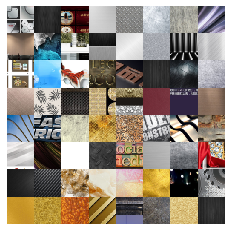

In [0]:
# input image
#process_image_name = ["fruit_image.npy", "graffiti_image.npy", "metal_image.npy" ]
PROCESS_FOLDER = os.path.join(os.getcwd(), 'process_data/')
training_data = np.load(PROCESS_FOLDER+'metal_image.npy')

# show some image
image_path = os.path.join(os.getcwd(), 'process_data/')+"metal_sample.png"
sample = training_data[:64]
save_images(sample, [8, 8], image_path)
show_images(image_path)

In [0]:
dcgan = DCGAN(input_dim = (64,64,3) , 
          discriminator_conv_filters = [32,64, 64,128], 
          discriminator_conv_kernel_size = [5,5,5,3], 
          discriminator_conv_strides = [2,2,2,2], 
          discriminator_batch_norm_momentum = 0.9 , 
          discriminator_activation = 'leaky_relu' , 
          discriminator_dropout_rate = 0.25, 
          discriminator_learning_rate = 0.005, 
          generator_initial_dense_layer_size = (4, 4, 128), 
          generator_upsample = [2, 2 , 2, 2,1], 
          generator_conv_filters = [ 128, 64, 32, 32, 3], 
          generator_conv_kernel_size = [5,5,5,5,5], 
          generator_conv_strides = [1,1,1, 1,1], 
          generator_batch_norm_momentum = 0.8, 
          generator_activation = 'leaky_relu', 
          generator_dropout_rate = None, 
          generator_learning_rate = 0.005, 
          optimiser = 'rmsprop', z_dim = 100 )
dcgan.discriminator.summary()
dcgan.generator.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 64, 64, 3)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 32, 32, 32)        2432      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 64)        0   

In [0]:
#OBJECTS = ["fruit", "graffiti", "metal"]
# if mode is "build", initialize all informations of discriminator and generator
mode = 'build'

DCGAN_FOLDER = os.path.join(os.getcwd(), 'Result/DCGAN')
PATH_MODEL = os.path.join(DCGAN_FOLDER, "metal")
if mode == 'build':
    dcgan.save(PATH_MODEL)
else:
    dcgan.load_weights(os.path.join(PATH_MODEL, 'weights/weights.h5'))

In [0]:
BATCH_SIZE = 64
EPOCHS =  5000
PRINT_EVERY_N_BATCHES = 100

dcgan.train(
    training_data
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = PATH_MODEL
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

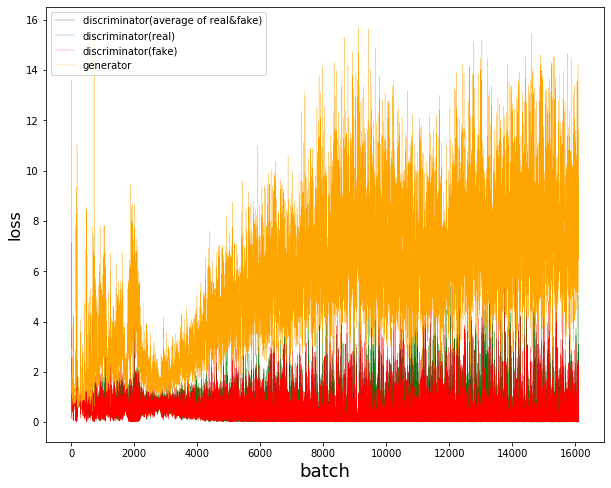

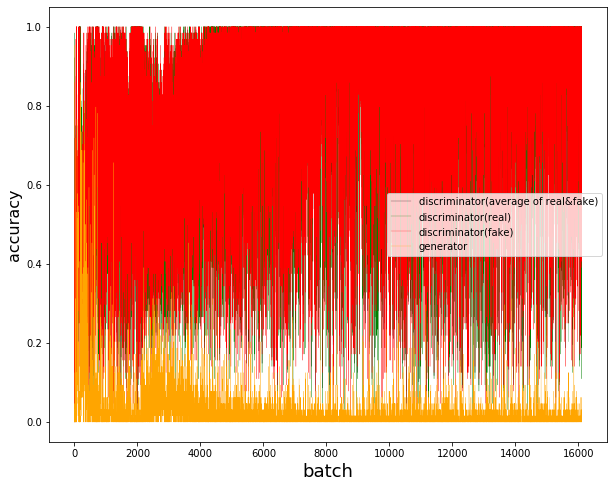

In [0]:
fig = plt.figure(figsize=(10, 8))
plt.plot([x[0] for x in dcgan.d_losses], color='black', label = "discriminator(average of real&fake)", linewidth=0.25)
plt.plot([x[1] for x in dcgan.d_losses], color='green', label = "discriminator(real)", linewidth=0.25)
plt.plot([x[2] for x in dcgan.d_losses], color='red', label = "discriminator(fake)", linewidth=0.25)
plt.plot([x[0] for x in dcgan.g_losses], color='orange',label = "generator", linewidth=0.25)
plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)
plt.legend()
plt.show()


fig = plt.figure(figsize=(10, 8))
plt.plot([x[3] for x in dcgan.d_losses], color='black', label = "discriminator(average of real&fake)", linewidth=0.25)
plt.plot([x[4] for x in dcgan.d_losses], color='green',label = "discriminator(real)",  linewidth=0.25)
plt.plot([x[5] for x in dcgan.d_losses], color='red',label = "discriminator(fake)", linewidth=0.25)
plt.plot([x[1] for x in dcgan.g_losses], color='orange',label = "generator", linewidth=0.25)
plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)
plt.legend()
plt.show()

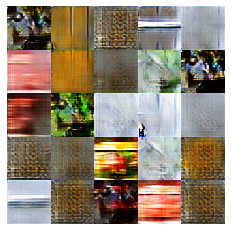

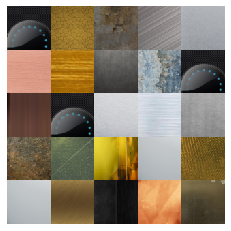

In [0]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, dcgan.z_dim))
gen_imgs = dcgan.generator.predict(noise)

gen_imgs_path = os.path.join(PATH_MODEL, 'gen_samples.png')
save_images(gen_imgs, [r, c], gen_imgs_path)
show_images(gen_imgs_path)

def compare_images(img1, img2):
    return np.mean(np.abs(img1 - img2))

cnt = 0
sml_imgs = []
for i in range( r * c):
  c_diff = 10
  c_img = None
  for k_idx, k in enumerate(training_data):
      diff = compare_images(gen_imgs[i, :,:,:], k)
      if diff < c_diff:
          c_img = np.copy(k)
          c_diff = diff
  sml_imgs.append( c_img)
sml_imgs = np.array(sml_imgs)

sml_imgs_path = os.path.join(PATH_MODEL, 'gen_samples_closest.png')
save_images(sml_imgs, [r, c], sml_imgs_path)
show_images(sml_imgs_path)